In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [110]:
cc = pd.read_csv('C:/Users/arabi/Documents/CC GENERAL.csv')

In [111]:
print(cc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [112]:
print(cc.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [113]:
print(cc.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [114]:
print(cc.isna().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [115]:
cc = cc.dropna()
print(cc)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
...      ...          ...                ...        ...               ...   
8943  C19184     5.871712           0.500000      20.90             20.90   
8945  C19186    28.493517           1.000000     291.12              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

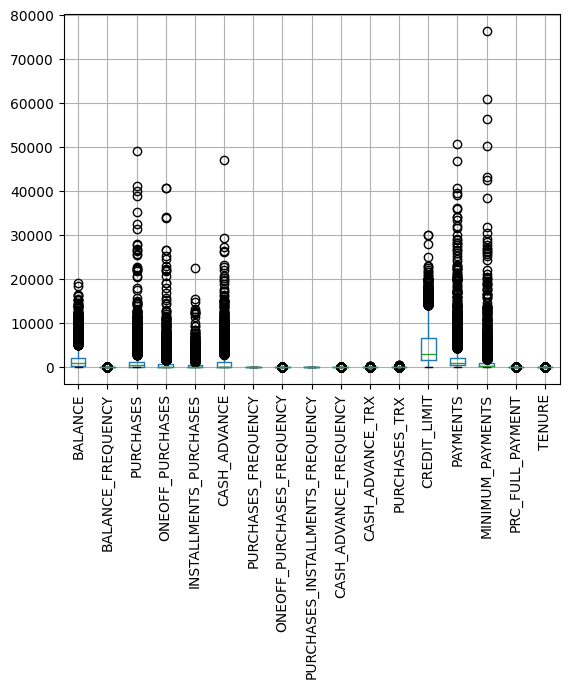

In [116]:
cc.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [117]:
cc = cc.drop('CUST_ID', axis = 1)

print(cc.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [118]:
feature_dict = {}
for feature in cc.columns:

    feature_dict[f"{feature}_q1"] = cc[feature].quantile(0.25)
    feature_dict[f"{feature}_q3"] = cc[feature].quantile(0.75)
    feature_dict[f"{feature}_IQR"] = feature_dict[f"{feature}_q3"] -feature_dict[f"{feature}_q1"] 

    cc_clean = cc[(cc[feature] >= feature_dict[f"{feature}_q1"]) & (cc[feature] <= feature_dict[f"{feature}_q3"])]



print(feature_dict)
print(cc)

{'BALANCE_q1': 148.095189, 'BALANCE_q3': 2105.195853, 'BALANCE_IQR': 1957.100664, 'BALANCE_FREQUENCY_q1': 0.909091, 'BALANCE_FREQUENCY_q3': 1.0, 'BALANCE_FREQUENCY_IQR': 0.09090900000000002, 'PURCHASES_q1': 43.3675, 'PURCHASES_q3': 1145.98, 'PURCHASES_IQR': 1102.6125, 'ONEOFF_PURCHASES_q1': 0.0, 'ONEOFF_PURCHASES_q3': 599.1, 'ONEOFF_PURCHASES_IQR': 599.1, 'INSTALLMENTS_PURCHASES_q1': 0.0, 'INSTALLMENTS_PURCHASES_q3': 484.14750000000004, 'INSTALLMENTS_PURCHASES_IQR': 484.14750000000004, 'CASH_ADVANCE_q1': 0.0, 'CASH_ADVANCE_q3': 1132.38549, 'CASH_ADVANCE_IQR': 1132.38549, 'PURCHASES_FREQUENCY_q1': 0.083333, 'PURCHASES_FREQUENCY_q3': 0.916667, 'PURCHASES_FREQUENCY_IQR': 0.833334, 'ONEOFF_PURCHASES_FREQUENCY_q1': 0.0, 'ONEOFF_PURCHASES_FREQUENCY_q3': 0.333333, 'ONEOFF_PURCHASES_FREQUENCY_IQR': 0.333333, 'PURCHASES_INSTALLMENTS_FREQUENCY_q1': 0.0, 'PURCHASES_INSTALLMENTS_FREQUENCY_q3': 0.75, 'PURCHASES_INSTALLMENTS_FREQUENCY_IQR': 0.75, 'CASH_ADVANCE_FREQUENCY_q1': 0.0, 'CASH_ADVANCE_FREQU

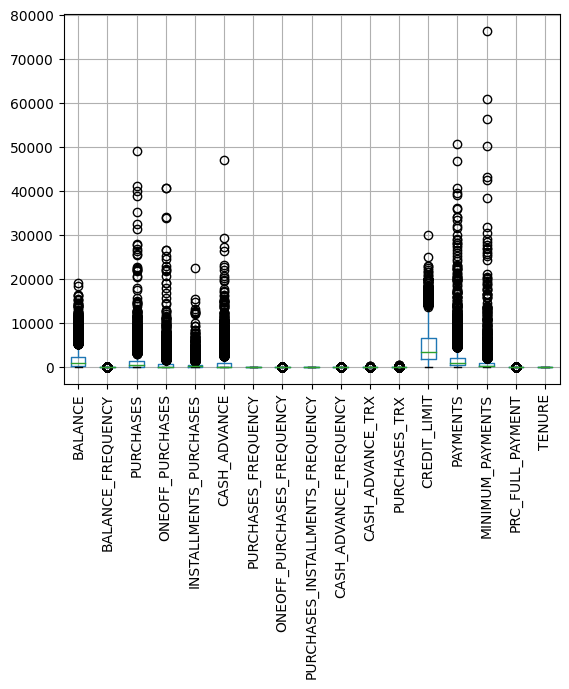

In [119]:
cc_clean.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [120]:
cc_columns = cc.columns
print(list(cc_columns))

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [121]:
std = StandardScaler()
cc_numpy = std.fit_transform(cc)

cc_preprocessed = pd.DataFrame(cc_numpy, columns = cc_columns)

print(cc_preprocessed)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.744625          -0.370047  -0.429184         -0.359160   
1     0.764152           0.067679  -0.473208         -0.359160   
2     0.426602           0.505405  -0.116413          0.099909   
3    -0.373910           0.505405  -0.465825         -0.349660   
4     0.099551           0.505405   0.142062         -0.359160   
...        ...                ...        ...               ...   
8631 -0.761342          -1.902089  -0.463563         -0.346751   
8632 -0.750546           0.505405  -0.338865         -0.359160   
8633 -0.752977          -0.297095  -0.406572         -0.359160   
8634 -0.757721          -0.297095  -0.473208         -0.359160   
8635 -0.586278          -1.099590   0.031295          0.289957   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.354826     -0.468655            -0.820769   
1                  -0.458839      2.568556            -1.236139   
2     

In [122]:
print(cc_preprocessed.shape)

(8636, 17)


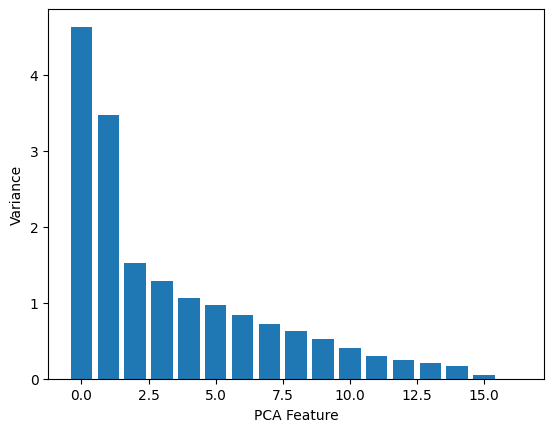

In [123]:
# Dimension reduction

pca = PCA()
pca.fit(cc_preprocessed)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel("PCA Feature")
plt.ylabel("Variance")
plt.show()

In [124]:
n_components = 2

pca_2 = PCA(n_components = n_components)
cc_pca_scaled = pca_2.fit_transform(cc_preprocessed)

print(cc_pca_scaled.shape)


(8636, 2)


c:\Users\arabi\anaconda3\envs\YPAI07\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arabi\anaconda3\envs\YPAI07\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arabi\anaconda3\envs\YPAI07\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arabi\anaconda3\envs\YPAI07\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

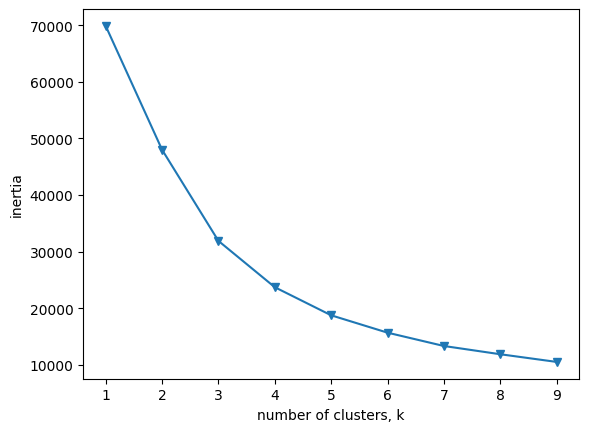

In [125]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(cc_pca_scaled)
    inertias.append(model.inertia_)

plt.plot(ks,inertias, '-v')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [126]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(cc_pca_scaled)
labels = kmeans.predict(cc_pca_scaled)

print(labels)

c:\Users\arabi\anaconda3\envs\YPAI07\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 3 0 ... 1 1 1]


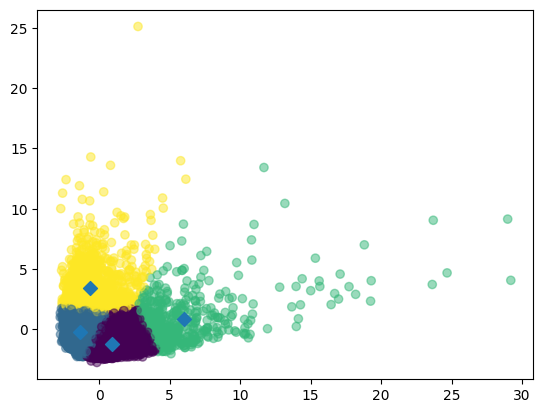

In [127]:
#plot clustering

xs = cc_pca_scaled[:,0]
ys = cc_pca_scaled[:,1]

plt.scatter(xs, ys, c = labels, alpha = 0.5)

centroids = kmeans.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker = 'D', s = 50)
plt.show()


In [128]:
cc['label'] = kmeans.labels_
column_names = cc.columns
stat_cc = cc.groupby('label').mean()
count = cc.groupby('label').size()
total_purchases = cc.groupby('label')['PURCHASES'].sum()
stat_cc['SIZE'] = count
stat_cc['TOTAL_PURCHASES'] = total_purchases
stat_cc

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,SIZE,TOTAL_PURCHASES
label,,,,,,,,,,,,,,,,,,,
0,828.995048,0.929811,1266.399474,639.528110,627.081043,146.671409,0.863864,0.306704,0.676401,0.030836,0.574097,21.690224,4283.474549,1362.600158,585.038496,0.290141,11.664072,3212,4067675.11
1,1070.532316,0.830285,226.651743,157.670549,69.326434,631.085780,0.194961,0.076566,0.112913,0.127299,2.341901,3.080054,3101.259259,911.501499,576.248164,0.071067,11.398929,3735,846544.26
2,3474.272110,0.987923,7021.550705,4607.752801,2415.042718,799.845292,0.953150,0.725824,0.809440,0.086599,2.423237,84.097510,9639.522822,6893.935178,1887.333767,0.283584,11.958506,482,3384387.44
3,4550.462900,0.965763,461.507978,298.200646,163.409793,4450.671444,0.266055,0.130302,0.166241,0.473986,13.968517,6.726595,7510.194321,3568.141096,2090.316544,0.034542,11.439105,1207,557040.13


In [129]:
print(stat_cc)

           BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
label                                                                  
0       828.995048           0.929811  1266.399474        639.528110   
1      1070.532316           0.830285   226.651743        157.670549   
2      3474.272110           0.987923  7021.550705       4607.752801   
3      4550.462900           0.965763   461.507978        298.200646   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
label                                                              
0                  627.081043    146.671409             0.863864   
1                   69.326434    631.085780             0.194961   
2                 2415.042718    799.845292             0.953150   
3                  163.409793   4450.671444             0.266055   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
label                                                                 
0               